In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
prev_data = pd.read_csv('previous_application.csv')

In [3]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the % of null values
print(round(100*(prev_data.isnull().sum()/len(prev_data))))

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [5]:
new_dropped_prev_data = prev_data.dropna(axis=1)
new_dropped_prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,...,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [6]:
print(round(100*(new_dropped_prev_data.isnull().sum()/len(new_dropped_prev_data))))

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64


## Steps we need to follow:

1. Remove duplicates: Eliminate all duplicate entries to ensure a clean data frame.
2. Attribute analysis:
- Contract Type & Loan Status: Examine these for each contract to draw key observations.
- Amount Applied & Process Start Day: Analyze these in parallel to identify correlations.
- Client Type & Processing Hour: Explore these attributes together to detect any patterns.

In [7]:
# We are finding the unique values for each column as we want to find which parameters are affecting the loan repayments.
new_dropped_prev_data.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_APPLICATION                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
NAME_YIELD_GROUP                     5
dtype: int64

In [8]:
new_dropped_prev_data.shape

(1670214, 21)

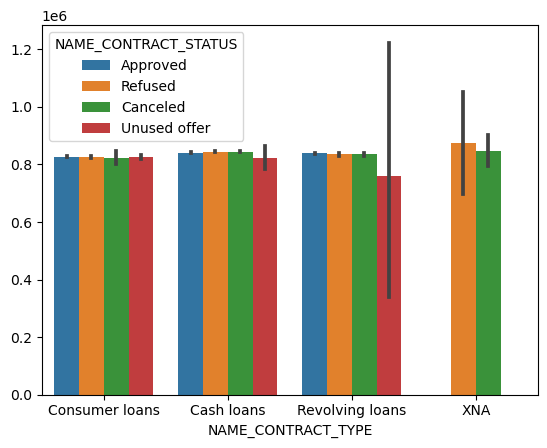

In [9]:
# Analyzing the number of requests received for each Contract Type and categorizing them by passed, rejected, unused, or canceled status.
g = sns.barplot(x = 'NAME_CONTRACT_TYPE' , y=new_dropped_prev_data.index,hue = 'NAME_CONTRACT_STATUS',data = new_dropped_prev_data)

We observe that cash loans tend to have a higher acceptance rate, but there's also a notable increase in user-initiated cancellations. On the other hand, revolving loans exhibit significant variability in the unused offers. 

Let's proceed to identify any outliers in the process.

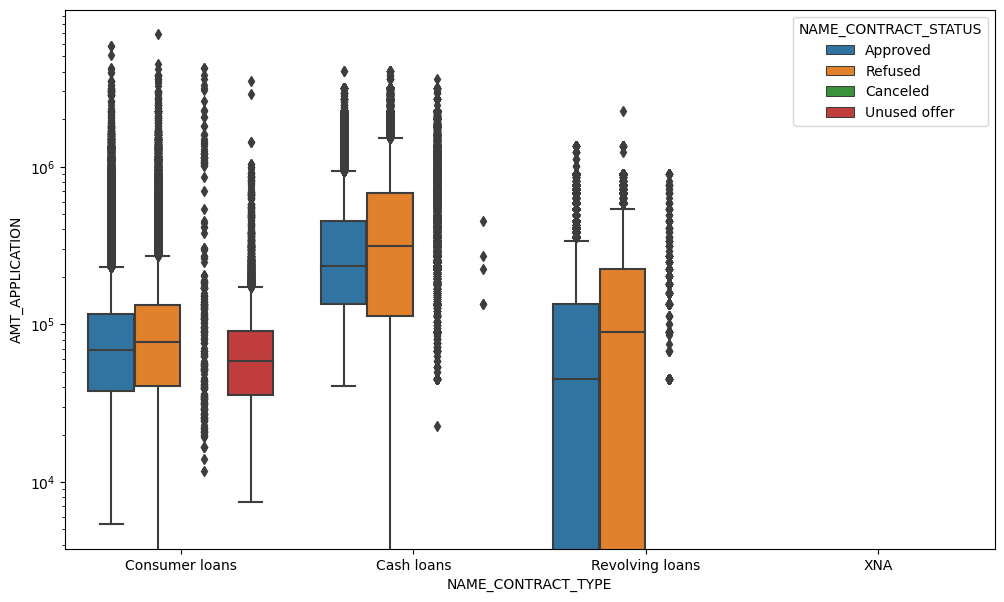

In [10]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x = 'NAME_CONTRACT_TYPE' , y = 'AMT_APPLICATION',hue = 'NAME_CONTRACT_STATUS',data = new_dropped_prev_data)
ax.set_yscale('log')

Text(0.5, 1.0, 'Loan Amounts by Contract Type')

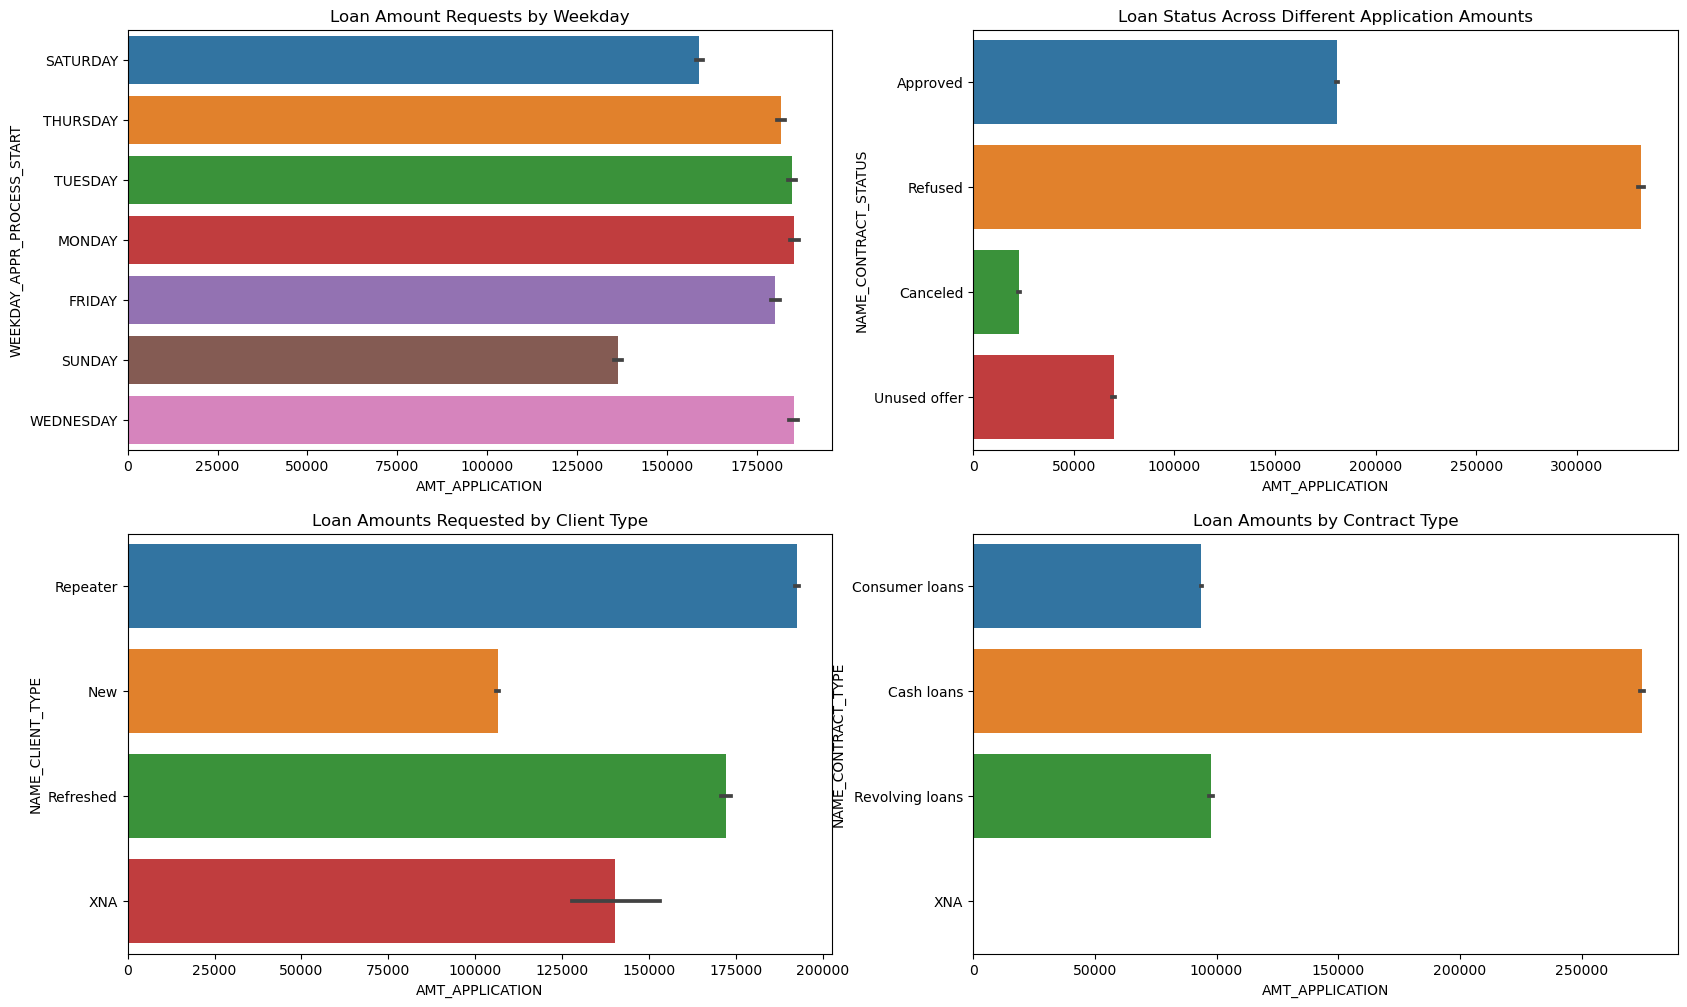

In [11]:
# Before removing outliers, let's explore additional attributes.
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plot_amount_weekday = sns.barplot(x='AMT_APPLICATION', y='WEEKDAY_APPR_PROCESS_START', data=new_dropped_prev_data)
plt.title('Loan Amount Requests by Weekday')

plt.subplot(2,2,2)
plot_amount_status = sns.barplot(x='AMT_APPLICATION', y='NAME_CONTRACT_STATUS', data=new_dropped_prev_data)
plt.title('Loan Status Across Different Application Amounts')

plt.subplot(2,2,3)
plot_amount_client_type = sns.barplot(x='AMT_APPLICATION', y='NAME_CLIENT_TYPE', data=new_dropped_prev_data)
plt.title('Loan Amounts Requested by Client Type')

plt.subplot(2,2,4)
plot_amount_contract_type = sns.barplot(x='AMT_APPLICATION', y='NAME_CONTRACT_TYPE', data=new_dropped_prev_data)
plt.title('Loan Amounts by Contract Type')

We observe that requests for large loan amounts are predominantly submitted during the first three days of the week. Additionally, loan applications between 15 to 25 lakhs are generally approved, while those around 30 lakhs tend to be either rejected or canceled.

An interesting observation arises: we could analyze the Hour of the Day to determine which types of loan requests are submitted at specific times and how the request outcomes vary by hour.

We can further explore the different Contract Types, Contract Status, Weekday Performance, and Client Types while keeping the numerical attribute HOUR_APPR_PROCESS_START constant to assess variations in loan applications.

Text(0.5, 1.0, 'Client Type Applying for Loans by Hour of Submission')

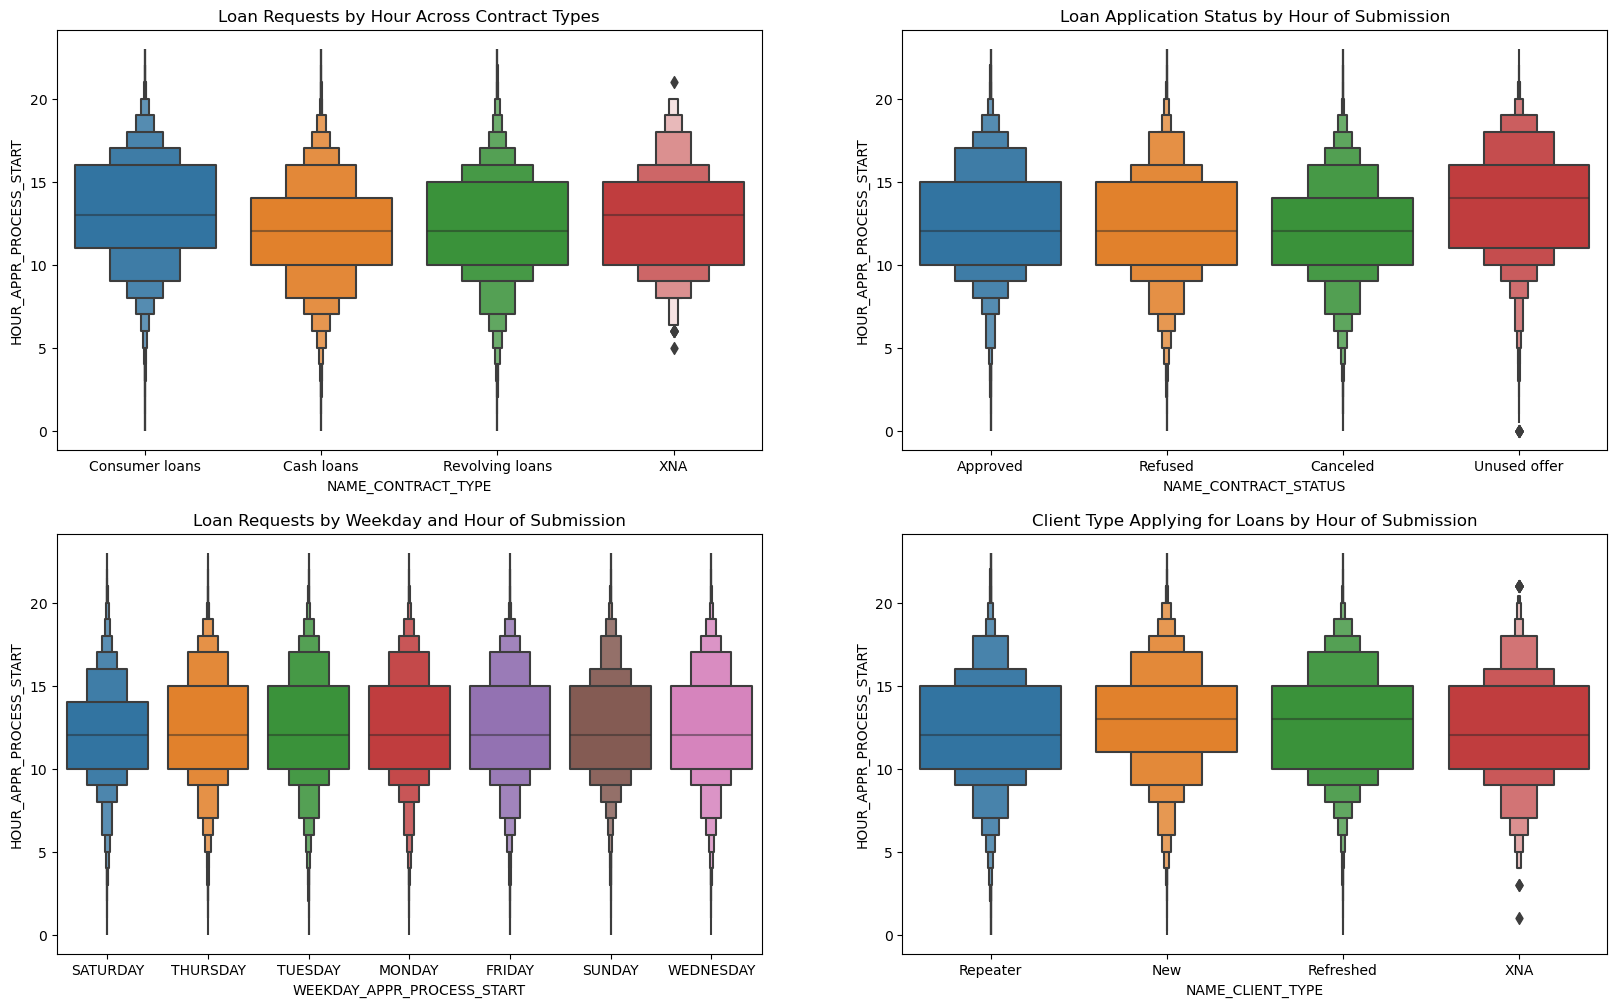

In [12]:
# Analyzing loan requests based on the hour of application across various attributes.
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plot_client_type_hour_process_contract_type = sns.boxenplot(x='NAME_CONTRACT_TYPE', y='HOUR_APPR_PROCESS_START', data=new_dropped_prev_data)
plt.title('Loan Requests by Hour Across Contract Types')

plt.subplot(2,2,2)
plot_client_type_hour_process_contract_status = sns.boxenplot(x='NAME_CONTRACT_STATUS', y='HOUR_APPR_PROCESS_START', data=new_dropped_prev_data)
plt.title('Loan Application Status by Hour of Submission')

plt.subplot(2,2,3)
plot_client_type_hour_process_weekday = sns.boxenplot(x='WEEKDAY_APPR_PROCESS_START', y='HOUR_APPR_PROCESS_START', data=new_dropped_prev_data)
plt.title('Loan Requests by Weekday and Hour of Submission')

plt.subplot(2,2,4)
plot_client_type_hour_process_client_type = sns.boxenplot(x='NAME_CLIENT_TYPE', y='HOUR_APPR_PROCESS_START', data=new_dropped_prev_data)
plt.title('Client Type Applying for Loans by Hour of Submission')

We aim to determine the loan amount associated with each status based on the type of loan request received.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


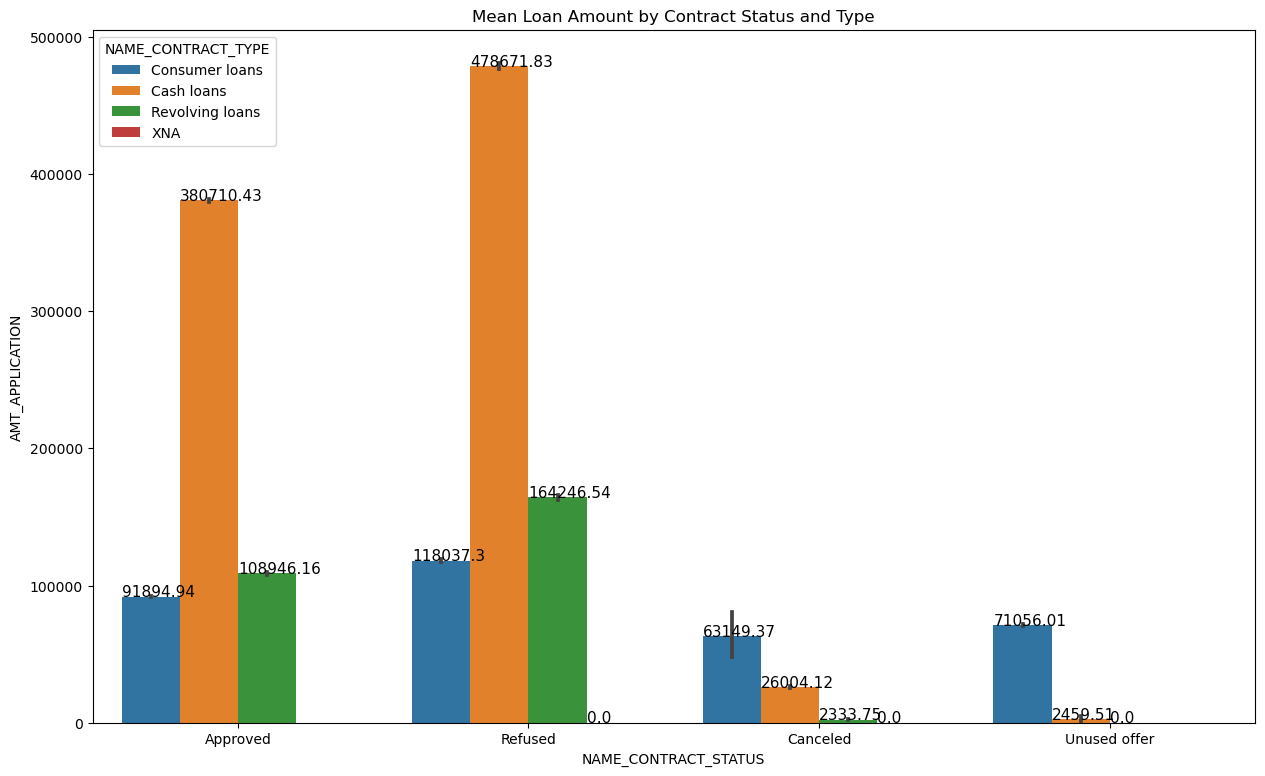

In [13]:
# This bar plot in Seaborn focuses on the mean values of the loan amounts.
plt.figure(figsize=(15,9))
plot_amount_hue_contract_type = sns.barplot(x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', hue='NAME_CONTRACT_TYPE', data=new_dropped_prev_data)
plt.title('Mean Loan Amount by Contract Status and Type')
for i in plot_amount_hue_contract_type.patches:
    plot_amount_hue_contract_type.text(i.get_x(), i.get_height() + 0.2, str(round(i.get_height(), 2)), fontsize=11)

- We'll explore the portfolio associated with each client type to determine the requested loan amounts.
- Additionally, we'll examine the cumulative status of portfolios based on the requested loan amounts.
- We'll also analyze the acquisition channels used in previous applications to see where clients were sourced.
- Finally, we'll investigate potential correlations within the data.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


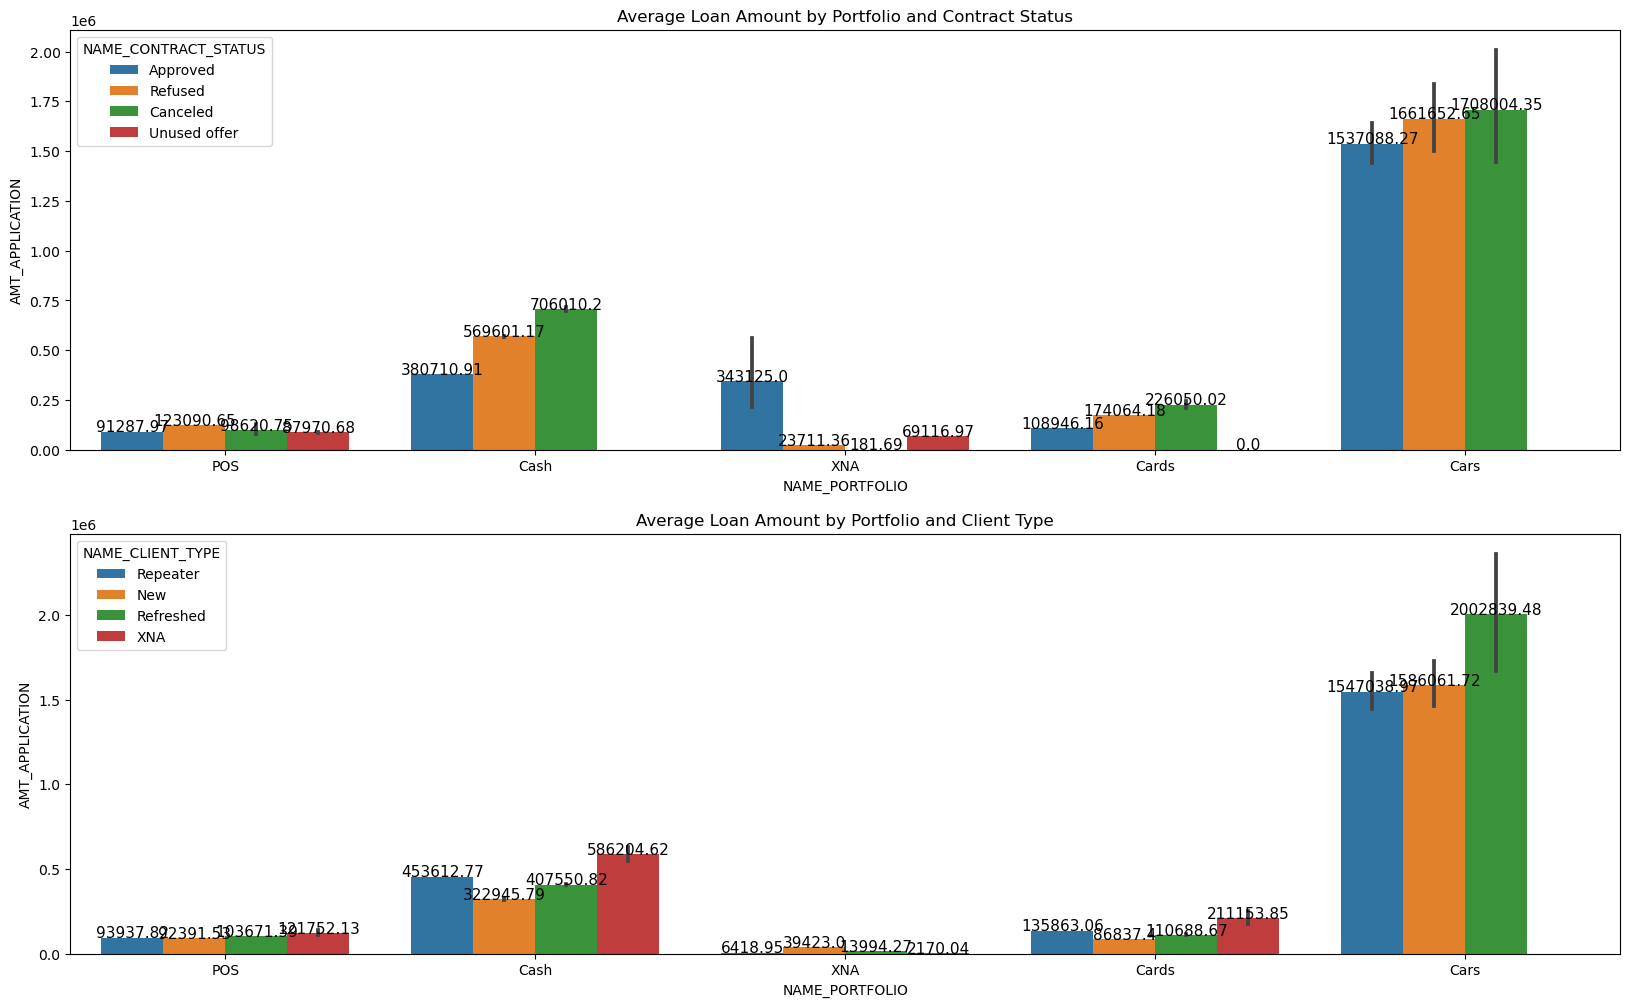

In [14]:
# Clarified the purpose of the bar plots, focusing on average loan amounts
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
portfolio_status_type_amount = sns.barplot(x='NAME_PORTFOLIO', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS', data=new_dropped_prev_data, ax=plt.gca())
plt.title('Average Loan Amount by Portfolio and Contract Status')
for i in portfolio_status_type_amount.patches:
    portfolio_status_type_amount.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.2, str(round(i.get_height(), 2)), fontsize=11, ha='center')

plt.subplot(2,1,2)
portfolio_client_type_amount = sns.barplot(x='NAME_PORTFOLIO', y='AMT_APPLICATION', hue='NAME_CLIENT_TYPE', data=new_dropped_prev_data, ax=plt.gca())
plt.title('Average Loan Amount by Portfolio and Client Type')
for i in portfolio_client_type_amount.patches:
    portfolio_client_type_amount.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.2, str(round(i.get_height(), 2)), fontsize=11, ha='center')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


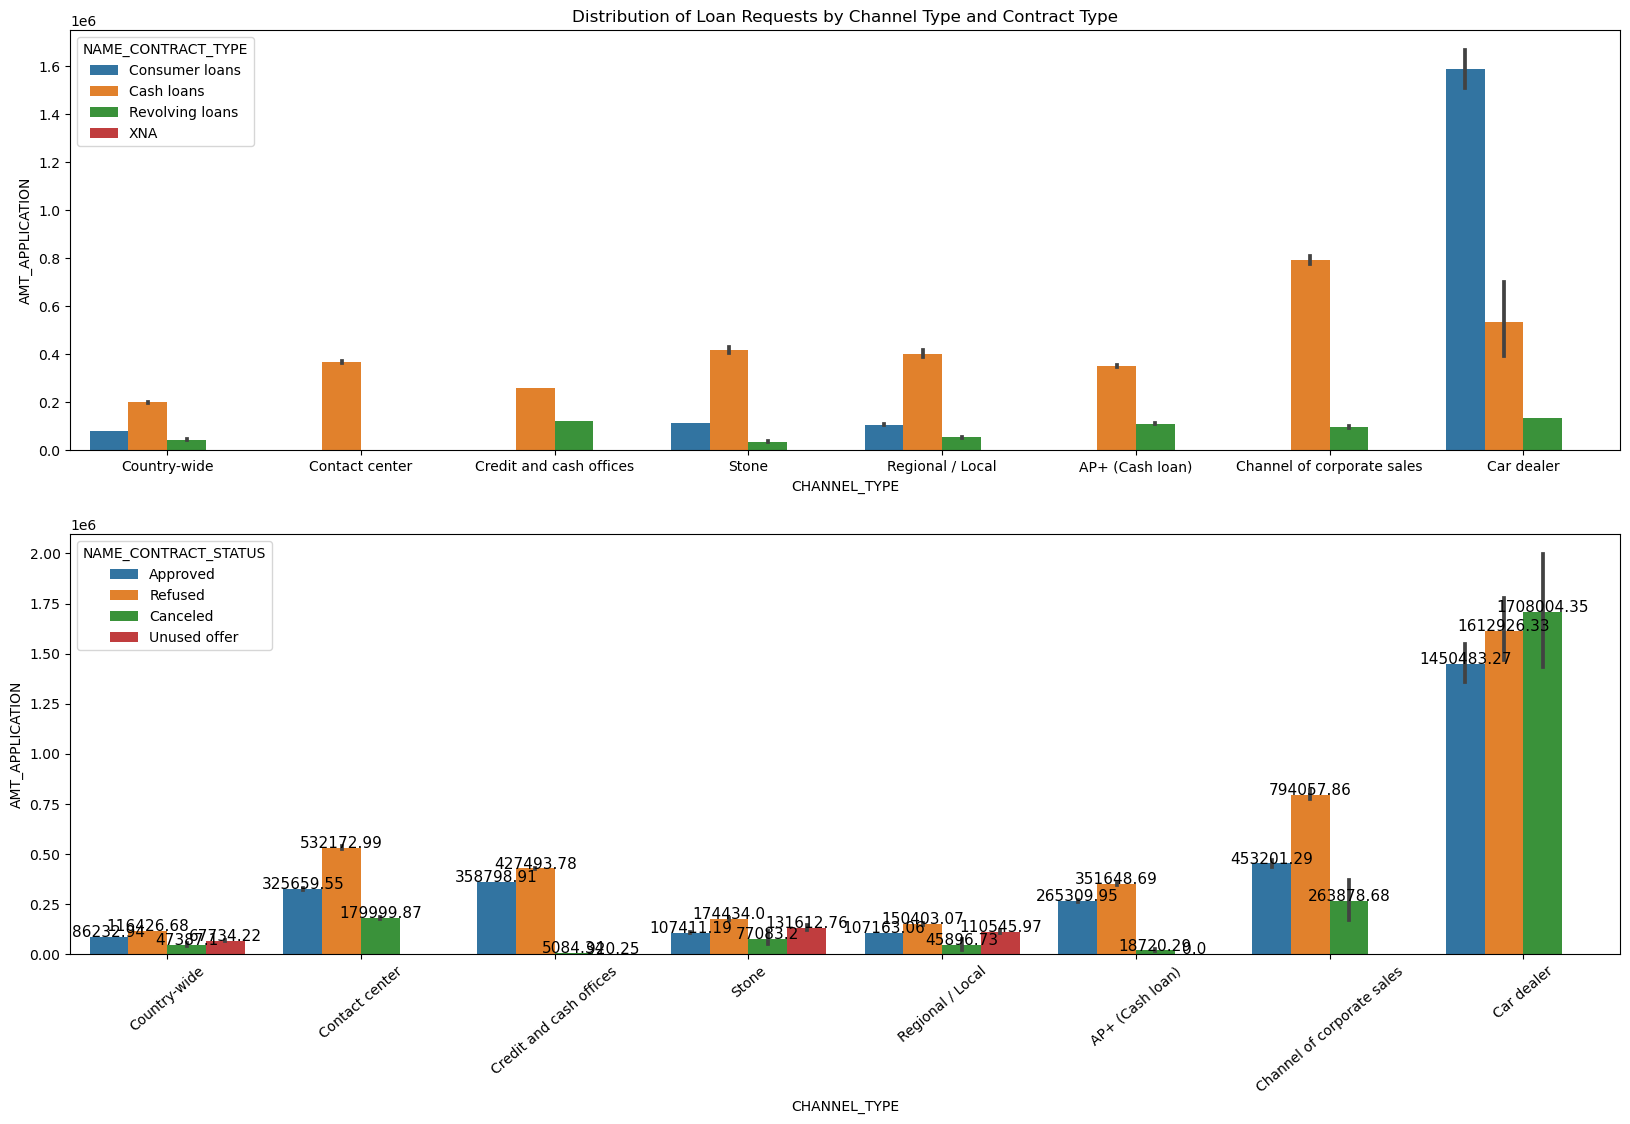

In [15]:
# Clarified the analysis focus on loan request distribution by channel and contract status
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
channel_plot = sns.barplot(x='CHANNEL_TYPE', y='AMT_APPLICATION', hue='NAME_CONTRACT_TYPE', data=new_dropped_prev_data)
plt.title('Distribution of Loan Requests by Channel Type and Contract Type')

plt.subplot(2,1,2)
channel_plot_status = sns.barplot(x='CHANNEL_TYPE', y='AMT_APPLICATION', hue='NAME_CONTRACT_STATUS', data=new_dropped_prev_data)
plt.xticks(rotation=40)
for i in channel_plot_status.patches:
    channel_plot_status.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.2, str(round(i.get_height(), 2)), fontsize=11, ha='center')


In [16]:
# First, we'll select the key attributes needed for correlation analysis and create a new data frame.
essential_attributes = ['HOUR_APPR_PROCESS_START', 'AMT_APPLICATION', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
df_essential = new_dropped_prev_data.loc[:, essential_attributes]
df_essential.head(10)

,HOUR_APPR_PROCESS_START,AMT_APPLICATION,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY
0,15,17145.0,Y,1
1,11,607500.0,Y,1
2,11,112500.0,Y,1
3,7,450000.0,Y,1
4,9,337500.0,Y,1
5,8,315000.0,Y,1
6,11,0.0,Y,1
7,7,0.0,Y,1
8,15,0.0,Y,1
9,15,0.0,Y,1


## Correlation

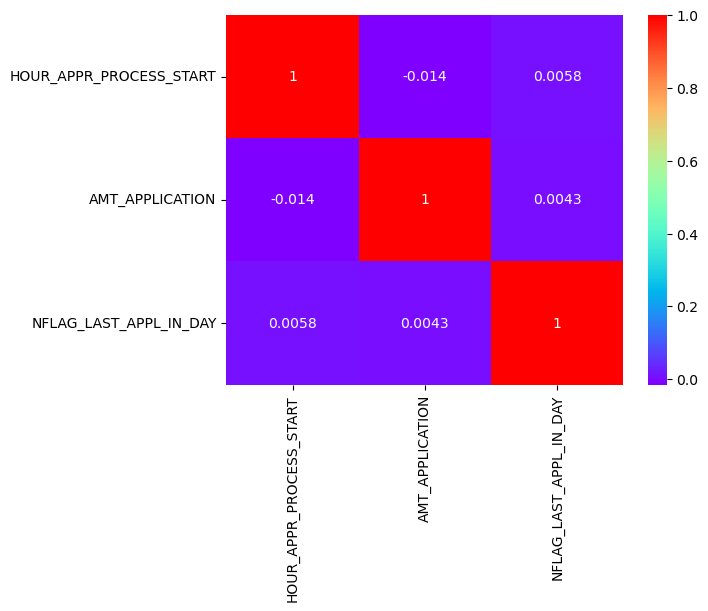

In [17]:
corr = df_essential.corr()
sns.heatmap(corr, annot=True, cmap = 'rainbow');

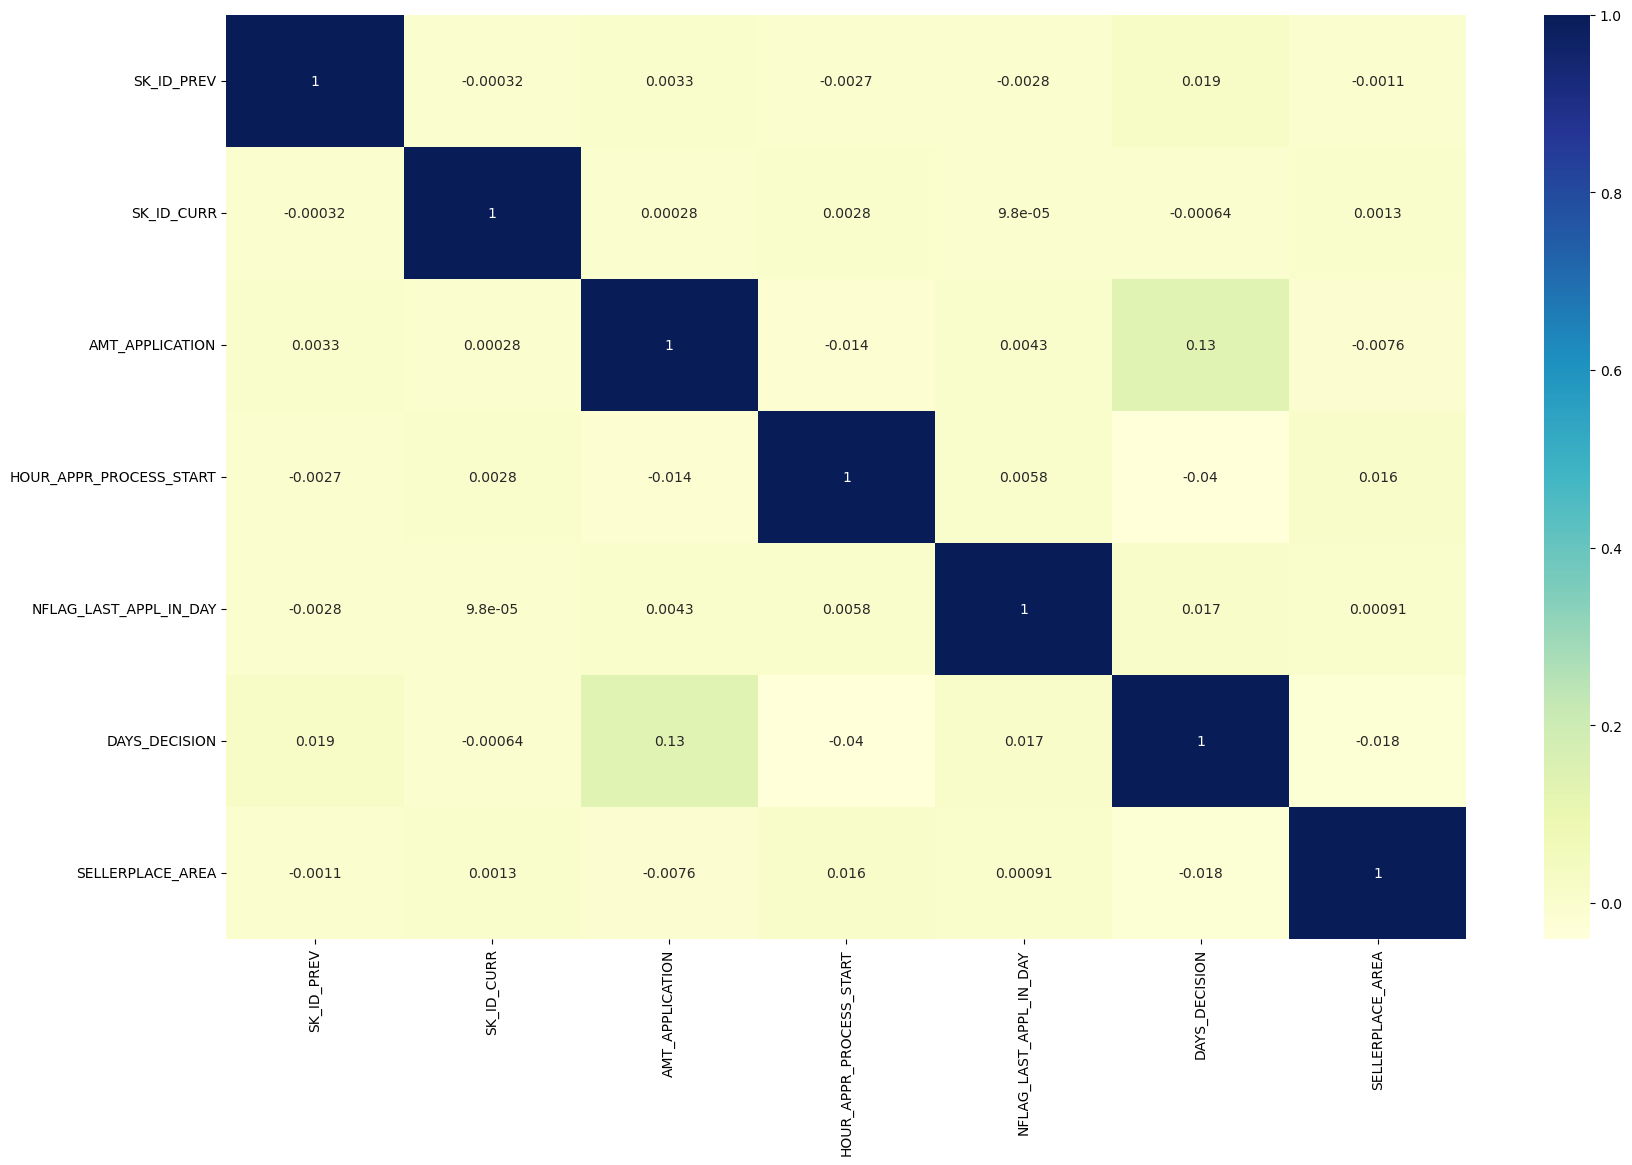

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(new_dropped_prev_data.corr(),cmap='YlGnBu',annot=True);

## Summary

- The analysis began with cleaning the dataset by removing duplicates to ensure a pristine data frame. We then delved into individual attributes, focusing on the relationship between Contract Type and Loan Status, and explored how the Amount Applied For correlates with the Process Start Day. We also investigated patterns related to Client Type and Processing Hour.

- Our detailed analysis revealed that cash loans generally have a higher acceptance rate but also experience more cancellations, while revolving loans show significant variability in unused offers. We planned to identify and remove outliers to refine our analysis further.

- In the attribute exploration phase, we visualized loan amounts across different attributes using bar plots, updating titles and comments for clarity. We analyzed loan amounts by portfolio, contract status, and client type, and adjusted the visualizations for better readability. Additionally, we examined loan request distribution by channel type and its impact on contract type and status.

- For the final step, we selected key attributes for correlation analysis, including HOUR_APPR_PROCESS_START, AMT_APPLICATION, FLAG_LAST_APPL_PER_CONTRACT, and NFLAG_LAST_APPL_IN_DAY, creating a new data frame, df_essential, for this purpose. The analysis aimed to uncover insights into loan request patterns, performance metrics, and potential correlations 